<a href="https://colab.research.google.com/github/Shivswaranjay/LGMVIP-DataScience/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition 

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # Plot the images and graphs
from sklearn.datasets import fetch_openml

## Loading -"MNIST Data Set"

## Containing Training samples = 60,000, Testing Samples = 10,000

## TensorFlow already contain MNIST data set which can be loaded using Keras

In [ ]:
import tensorflow as tf

In [ ]:
## this is basically handwritten characters based on 28x28 sized images of 8 to 9
mnist = tf.keras.datasets.mnist

## After loading the MNIST data, Divide into train and Test datasets

In [ ]:
# unpacking the dataset into train and test datasets 
(X_train, y_train), (X_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

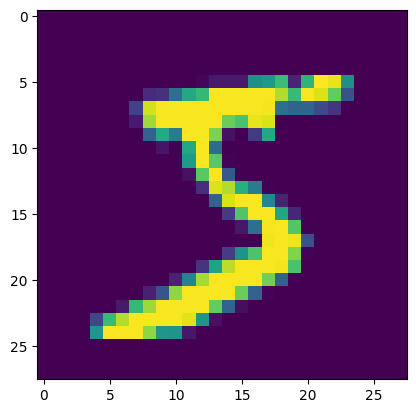

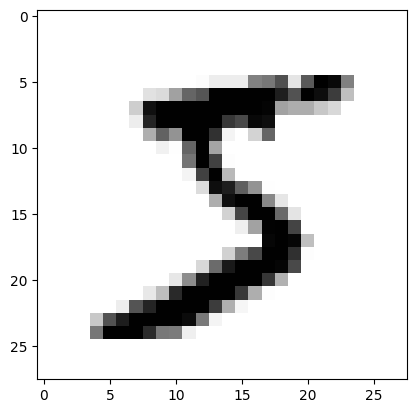

In [ ]:
# just check the graph, how data Looks Like
plt.imshow(X_train[0])
# in order to execute the graph
plt.show() 
# however we dont know whether its color image or binary images 
# so inorder to plot it change the configuration
plt.imshow(X_train[0], cmap = plt.cm.binary)

## Cheking the value of each pixcel before normalization

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the data (Pre Processing Step)

### As images are in gray level (1 Channel ==> 0 to 255 ), not colored (RGB)

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
# We can also do like this: Divede no. by 255 like X_train / 255 but we built in command or method for normalize the number.

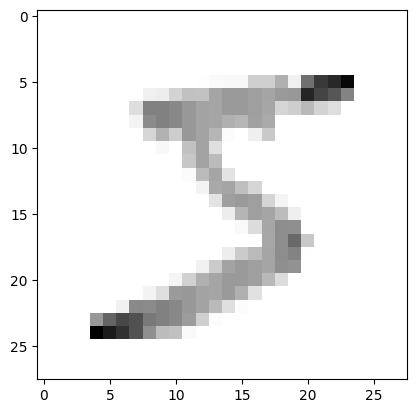

In [ ]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [ ]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
y_train[0]

5

## Resizing  image to make it sutable for apply convolution operation

In [ ]:
# Increasing one dimention for kernel operation
IMAGE_SIZE = 28 
X_trainr = np.array(X_train).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
X_testr = np.array(X_test).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)

In [ ]:
print("Training Samples Dimention",X_trainr.shape)
print("Testing Samples Dimention",X_testr.shape)

Training Samples Dimention (60000, 28, 28, 1)
Testing Samples Dimention (10000, 28, 28, 1)


## Creating a Deep Neural Network

### Training on 60000 samples of data 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Creating a neural network 
model = Sequential()

In [ ]:
# First convolution layer to maintain input layer size
model.add(Conv2D(64,(3,3),input_shape = X_trainr.shape[1:]))
# Activation function to make non linear i.e., any value is less than zero then it will drop it or remove the values.
model.add(Activation("relu"))
# Maxpooling
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Second convolution layer to maintain input layer size
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Third convolution layer.
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [ ]:
# Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

In [ ]:
# Fully connected layer 3
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
print("Total Training Samples = ",len(X_trainr))

Total Training Samples =  60000


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.fit(X_trainr, y_train, epochs = 10 , validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 82s 63ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0673 - val_accuracy: 0.9808
Epoch 2/10
1313/1313 [==============================] - 78s 60ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0652 - val_accuracy: 0.9808
Epoch 3/10
1313/1313 [==============================] - 82s 62ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0576 - val_accuracy: 0.9834
Epoch 4/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0571 - val_accuracy: 0.9845
Epoch 5/10
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0580 - val_accuracy: 0.9849
Epoch 6/10
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.0590 - val_accuracy: 0.9835
Epoch 7/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0611 -

## Saving Model

### Using Pickle

In [ ]:
import pickle

In [ ]:
# filename = 'Handwritten_Digit_Recognition'
filename = '/content/drive/MyDrive/ML_Projects/Saved Models/HDR_by_Pickle'
pickle.dump(model,open(filename,'wb'))

In [ ]:
pickle_model = pickle.load(open('/content/drive/MyDrive/ML_Projects/Saved Models/HDR_by_Pickle','rb'))

### Using Joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'/content/drive/MyDrive/ML_Projects/Saved Models/HDR_by_joblib')

['/content/drive/MyDrive/ML_Projects/Saved Models/HDR_by_joblib']

## Loading Model


### Using Pickle

In [ ]:
model = pickle.load(open("/content/drive/MyDrive/ML_Projects/Saved Models/Handwritten Digit Recognition/HDR_by_Pickle","rb"))

### Using Joblib

In [ ]:
model2 = joblib.load('/content/drive/MyDrive/ML_Projects/Saved Models/Handwritten Digit Recognition/HDR_by_joblib')

## Evalutateing on Testing Data Set

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 7s 22ms/step - loss: 283.6307 - accuracy: 0.8683
Test loss on 10,000 test samples 283.6307373046875
Validation Accuracy on 10,000 test samples 0.8683000206947327


In [ ]:
predicions = model.predict([X_testr])

313/313 [==============================] - 6s 18ms/step


In [ ]:
print(predicions)

[[0.         0.         0.         ... 0.99999994 0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.99999994 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Checking

In [ ]:
# Convert the prediction from one hot encoding
print(np.argmax(predicions[0]))

7


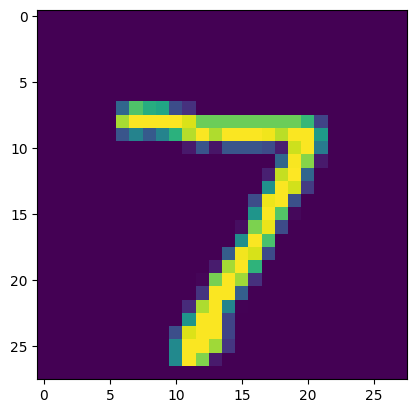

In [ ]:
plt.imshow(X_test[0])

8


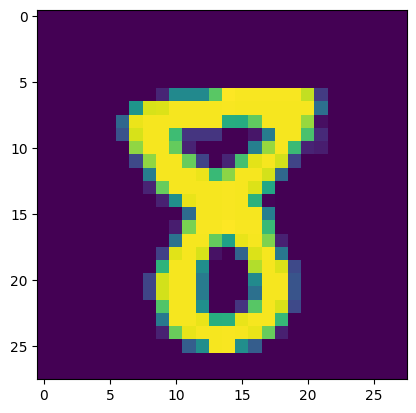

In [ ]:
print(np.argmax(predicions[128]))
plt.imshow(X_test[128])

## Testing on our Data


In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/images.jpg")

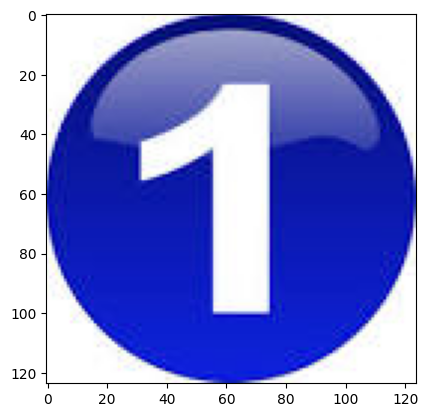

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(124, 124, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(124, 124)

In [ ]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
newing = tf.keras.utils.normalize(resized, axis = 1) # 0 to 1 scaling

In [ ]:
newing = np.array(newing).reshape(-1, 28, 28,1)

In [ ]:
newing.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(newing)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(np.argmax(predictions))

1
